In [1]:
from UCLSE.dyna_q.Experiment2a import Experiment,Dyna_QAgentTabular
from UCLSE.dyna_q.dyna_q import TabularMemory
import numpy as np
import pandas as pd
import visdom

import threading
import logging
from queue import Queue

In [2]:
vis=visdom.Visdom(port=8097)

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
90    34   33  ZIP6_34_0 1     NaN  ZIP6
      37   38  HBL1_37_0 1     NaN  HBL1
91    36   36  ZIP0_36_0 1     NaN  ZIP0
92    2    1   ZIP2_2_0  1     NaN  ZIP2
      26   22  ZIP1_26_0 1     NaN  ZIP1
      33   32  HBL5_33_0 1     NaN  HBL5
      35   35  HBL2_35_0 1     NaN  HBL2
      38   39  ZIP8_38_0 1     NaN  ZIP8
94    1    0   HBL3_1_0  1     NaN  HBL3
95    25   20  ZIP9_25_4 1     NaN  ZIP9
96    13   9   ZIP7_13_0 1     NaN  ZIP7
      31   28  ZIP4_31_2 1     NaN  ZIP4
99    12   8   HBL4_12_0 1     NaN  HBL4
      19   13  CON8_19_0 1     NaN  CON8
100   30   26  CON6_30_0 1     NaN  CON6
103   13   10  ZIP7_13_1 1    ZIP7   NaN
      19   14  CON8_19_1 1    CON8   NaN
      25   21  ZIP9_25_5 1    ZIP9   NaN
      39   42  HBL6_39_1 1    HBL6   NaN
104   24   19  CON

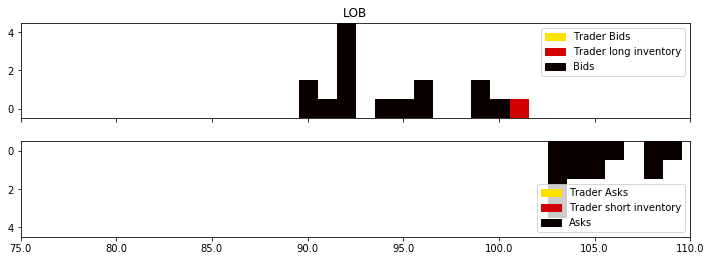

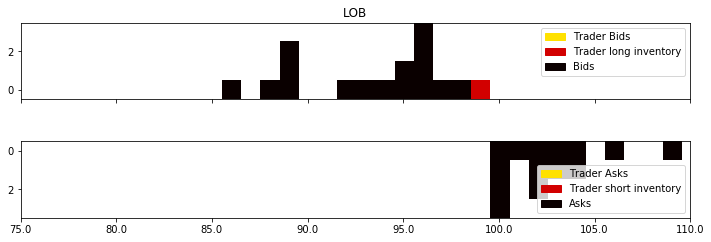

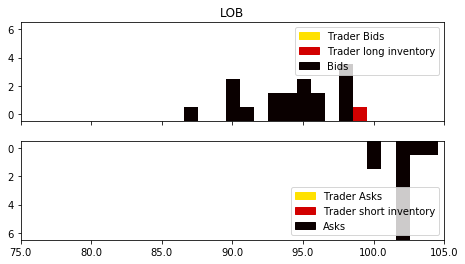

In [3]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':5000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':True,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-2}


exploration ={"mode":'UCB',
        "type": "exponential",
        "init_epsilon": 0.8,
        "min_epsilon": 0.05,
        "decay_steps": 100000,
        "decay_eps": 0.99,
        "choice":'least_bonus'}

dyna_kwargs={'n_actions':5,'initial_Q':1,'init_epsilon':0.8,'exploration':exploration,'n_statespace':9}



experiment=Experiment(trader_pref_kwargs,timer_kwargs,
           price_sequence_kwargs,noise_kwargs,
           messenger_kwargs,env_kwargs,trader_kwargs,
           lobenv_kwargs,dyna_kwargs,agent_kwargs=None,visdom=vis,dyna_Q_agent=Dyna_QAgentTabular)

In [ ]:
experiment.new_train_setup(planning_steps=1,planning=True,graph=True,MaxEpisodes=1000)
experiment.train(MaxEpisodes=30000,folder='checkpoints/exp2UCB',start_episode=experiment.episode)

In [7]:
Experiment.resume(exp=experiment,best=True,folder='checkpoints/exp2UCB')

=> loading checkpoint 'checkpoints/exp2UCB\dyna_best.pth.tar'
=> loaded checkpoint 'checkpoints/exp2UCB\dyna_best.pth.tar' (epoch 28441)
keys unused in checkpoint data:  ['episode', 'setup']


In [8]:
experiment.dyna_q_agent

n actions:5 initial_q: 1, tabular memory: state counter length: 7662, state_action counter length: 24989, total experiences: 1185028, exploration mode UCB

In [6]:
experiment.recover_plots()

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
90    22   22  ZIP9_22_0 1     NaN  ZIP9
94    7    3   ZIP2_7_2  1     NaN  ZIP2
      10   9   ZIP3_10_0 1     NaN  ZIP3
      15   15  CON8_15_1 1     NaN  CON8
95    17   17  CON4_17_1 1     NaN  CON4
      20   21  HBL9_20_0 1     NaN  HBL9
96    8    5   CON2_8_1  1     NaN  CON2
      11   11  CON7_11_1 1     NaN  CON7
      13   13  CON6_13_1 1     NaN  CON6
      19   20  HBL5_19_1 1     NaN  HBL5
97    18   19  HBL0_18_0 1     NaN  HBL0
98    9    7   ZIP7_9_0  1     NaN  ZIP7
100   8    6   CON2_8_0  1    CON2   NaN
      11   12  CON7_11_0 1    CON7   NaN
      13   14  CON6_13_0 1    CON6   NaN
101   7    4   ZIP2_7_3  1    ZIP2   NaN
104   22   23  ZIP9_22_1 1    ZIP9   NaN
107   9    8   ZIP7_9_1  1    ZIP7   NaN
110   10   10  ZIP3_10_1 1    ZIP3   NaN


C:\Users\micro_zo50ceu\OneDrive - University College London\BUCLSE\UCLSE\dyna_q\Experiment2a.py:603: UserWarning: no eval net for agent, skipping
  warnings.warn('no eval net for agent, skipping')


Dyna-Q - EXP 1, | Ep: , 1, | timestep:  100 | Ep_r: 1.1720000000000002|profit:1 start:127|end:227
Dyna-Q - EXP 1, | Ep: , 11, | timestep:  33 | Ep_r: 5.0680000000000005|profit:1 start:1764|end:1797
Dyna-Q - EXP 1, | Ep: , 21, | timestep:  14 | Ep_r: -2.9639999999999995|profit:-2 start:3130|end:3144
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 31, | timestep:  74 | Ep_r: -1.6759999999999997|profit:0 start:557|end:631
Dyna-Q - EXP 1, | Ep: , 41, | timestep:  72 | Ep_r: -1.6839999999999997|profit:0 start:2108|end:2180
Dyna-Q - EXP 1, | Ep: , 51, | timestep:  32 | Ep_r: -3.0079999999999996|profit:-3 start:3502|end:3534
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 61, | timestep:  100 | Ep_r: 1.092|profit:0 start:894|end:994
Dyna-Q - EXP 1, | Ep: , 71, | timestep:  2 | Ep_r: -3.0999999999999996|profit:-3 start:2574|end:2576
Dyna-Q - EXP 1, | Ep: , 81, | timestep:  3 | Ep_r: 

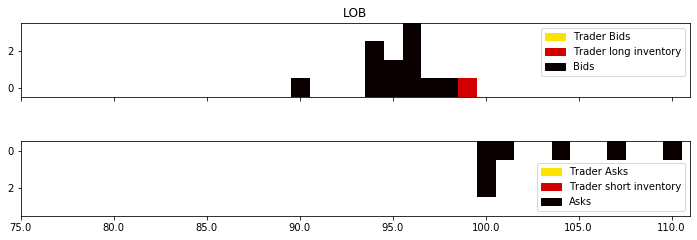

In [9]:
agent=experiment.dyna_q_agent
experiment.test_setup(MaxEpisodes=500,agent=agent)

In [8]:
d=pd.DataFrame(experiment.rwd_test)

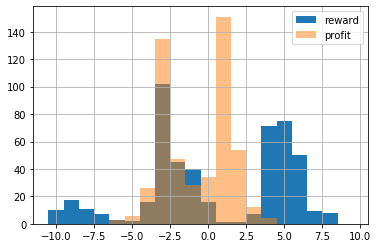

In [9]:
bins=np.arange(-10.5,10.5,1)
ax=d[4].hist(bins=bins,label='reward')
d[5].hist(bins=bins,label='profit',ax=ax,alpha=0.5)
ax.legend()

In [10]:
d.describe()

,0,1,2,3,4,5
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.682000,2059.756000,9667.648000,249.500000,0.244680,-0.736000
std,1203.614267,1203.723668,5654.534577,144.481833,4.965439,2.180783
min,19.000000,22.000000,100.000000,0.000000,-13.788000,-6.000000
25%,979.750000,1027.500000,4656.750000,124.750000,-3.028000,-3.000000
50%,1989.000000,2024.500000,9655.000000,249.500000,-0.882000,0.000000
75%,3029.500000,3094.500000,14697.000000,374.250000,5.074000,1.000000
max,4154.000000,4185.000000,19537.000000,499.000000,8.136000,4.000000


In [44]:
tab=experiment.dyna_q_agent.tabular
sample_state=tuple(tab.sample_state(reps=1))[0]
sample_action=tab.sample_action_from_state(sample_state)
sample_action

0

In [46]:
tab.memory[sample_state][sample_action]

{'count': 16,
 'reward': Counter({0.004: 14, -9.0: 2}),
 'done': Counter({0: 14, 1: 2}),
 's_': Counter({(0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.0, 0.0), 0): 4,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.05, 0.0), 0): 2,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.2, 0.0), 0): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.1, 0.0), 0): 1,
          (-9.0, (0.0, 2, 1, 0.0, 0, 0.2, 1.0, 0.0, 0.0), 1): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.05, 0.0), 0): 3,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.2, 0.0), 0): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.25, 0.0), 0): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.3, 0.0), 0): 1,
          (-9.0, (0.0, 2, 1, 0.0, 0, 0.2, 1.0, -0.05, 0.0), 1): 1}),
 'Q': -1.2072998717367351}

In [49]:
np.sqrt(np.log(experiment.total_steps)/(2*tab.memory[sample_state][sample_action]['count']))

0.6341608968320384

In [51]:
from math import sqrt,log

In [52]:
%timeit sqrt(845000)

101 ns ± 6.16 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [53]:
%timeit np.sqrt(845000)

924 ns ± 8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
def q_update(tab,sample_state,sample_action,val=0,gamma=0.5):
    if 'Q' not in tab.memory[sample_state][sample_action]:
        tab.memory[sample_state][sample_action]['Q']=val


    trans=tab.memory[sample_state][sample_action]['s_']
    denom=tab.memory[sample_state][sample_action]['count']
            #sum_a (p(s,s_,a)*(R_(s,s_,a)+gamma*terminal_state*max_a'(Q(s_,a')))
    return gamma*sum([count*(k[0]+((k[2]+1)%2)*max_get_Q(tab,k[1])) for k,count in trans.items()])/denom
    
def max_get_Q(tab,state,total_steps,val=0,beta=1):
    max_state=-1
    UCB_num=sqrt(beta*log(total_steps))
    for action,dic in tab.memory[sample_state].items():
        if 'Q' not in dic: dic['Q']=val
            
        times_visited=dic['count']
        UCB_denom=sqrt(2*times_visited)
        UCB=UCB_num/UCB_denom
            
        if dic['Q']+UCB>max_state:
            max_action=action
            max_state=dic['Q']
            
    return max_state

def wipe_update(tab,val):
    #for all q values in the memory, set to a value
    for state in tab.memory:
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']=val
            
def full_update(tab,gamma):
    for state in tab.memory:
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']+=q_update(tab,state,action,gamma)
            




In [33]:
gamma=experiment.dyna_q_agent.gamma
gamma
tab=experiment.dyna_q_agent.tabular

In [35]:
%timeit tab.full_update(gamma)

464 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
def memoize(f):
    memo = {}
    def helper(*x,**kwargs):
        if x not in memo:            
            memo[tuple(x)] = f(*x,**kwargs)
        return memo[x]
    return helper


def q_update(tab,sample_state,sample_action,max_get_Q,val=0,gamma=0.5):
    if 'Q' not in tab.memory[sample_state][sample_action]:
        tab.memory[sample_state][sample_action]['Q']=val


    trans=tab.memory[sample_state][sample_action]['s_']
    denom=tab.memory[sample_state][sample_action]['count']
            #sum_a (p(s,s_,a)*(R_(s,s_,a)+gamma*terminal_state*max_a'(Q(s_,a')))
    return sum([count*(k[0]+gamma*((k[2]+1)%2)*tab.max_get_Q(k[1])[0]) for k,count in trans.items()])/denom

def max_get_Q(tab,state,val=0):
    max_state_value=-100000

    if state in tab.memory:

        for action,dic in tab.memory[state].items():
            if 'Q' not in dic: dic['Q']=val
            if dic['Q']>max_state_value:
                max_action=action
                max_state_value=dic['Q']

    else:
        #the next state has not been experienced in memory
        max_state_value=tab.initial_Q
        max_action=np.random.randint(0,tab.n_actions)

    return max_state_value,max_action

def full_update_memo(tab,gamma):
    
    for state in tab.memory:
        mem_max_get_Q=memoize(max_get_Q) 
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']=q_update(tab,state,action,mem_max_get_Q,gamma=gamma)


In [41]:

%timeit full_update_memo(tab,gamma)

416 ms ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:




def worker(tab,state,action,gamma):
    
    #logging.debug('Starting')
    tab.memory[state][action]['Q']+=tab.q_update(state,action,gamma=gamma)
    #logging.debug('Ending')

    
def mt():    
    gamma=0.5  
    threads=[]
    for state in tab.memory:
        for action in tab.memory[state]:
            t=threading.Thread(name=str(state)+str(action),target=worker,args=(tab,state,action,gamma,))
            threads.append(t)
            t.start()

In [37]:
%timeit mt()

1.48 s ± 6.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
from queue import Queue


def do_stuff(q):
    while not q.empty():
        
        state,action=q.get()
        #logger.debug('Starting'+str(state)+str(action))
        gamma=0.5
        tab.memory[state][action]['Q']=tab.q_update(state,action,max_get_Q,gamma=gamma)
        #logger.debug('Ending'+str(state)+str(action))
        q.task_done()
        
# LOG_FILENAME='logging_example.out'
# logger = logging.getLogger()
# fhandler = logging.FileHandler(filename=LOG_FILENAME, mode='w')
# formatter = logging.Formatter('%(asctime)s - [%(levelname)s] - %(threadName)s - %(levelname)s - %(message)s')
# fhandler.setFormatter(formatter)
# logger.addHandler(fhandler)
# logger.setLevel(logging.DEBUG)        
        

    
    
        
def qt():
    q=Queue(maxsize=0)
    num_threads=10
    
    for state in tab.memory:
        for action in tab.memory[state]:
            q.put((state,action))
    
    for i in range(num_threads):
        t=threading.Thread(target=do_stuff,args=(q,))
        #t.setDaemon(True)
        t.start()  


In [43]:
%timeit qt()




428 ms ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
from queue import Queue
q=Queue(maxsize=0)
num_threads=10

for state in tab.memory:
        for action in tab.memory[state]:
            q.put((state,action))

In [22]:
state,action=q.get()

In [23]:
state

(0.2, 1, 0, 0.0, 0, 0.2, 1.0, 0.25, 0.0)